# LSTM

## 0. Data Load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/기상청/데이터')

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from tqdm.notebook import tqdm
tqdm.pandas()

import random
from functools import reduce

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Text(0.5, 1.0, '한글확인')

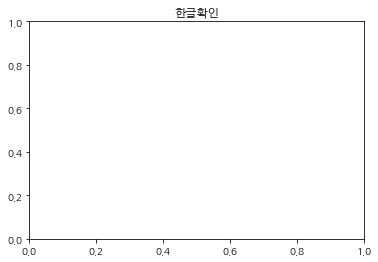

In [ ]:
# plt.title('한글확인')

In [4]:
df_metric1 = pd.read_csv('df_metric_bm.csv', encoding='CP949')
df_metric2 = pd.read_csv('df_metric_jb.csv', encoding='CP949')
df_metric3 = pd.read_csv('df_metric_hr.csv', encoding='CP949')

In [5]:
df_pred1 = pd.read_csv('df_pred_bm.csv', encoding='CP949')
df_pred2 = pd.read_csv('df_pred_jb.csv', encoding='CP949')
df_pred3 = pd.read_csv('df_pred_hr.csv', encoding='CP949')

In [ ]:
df_metric1.head(2)

,age,sex,sm_cat,mse,rmse,mape
0,20대,남성,샤워코롱,0.497436,0.705292,inf
1,30대,남성,샤워코롱,0.788259,0.887840,inf


In [ ]:
df_result = pd.read_csv('df_result_0624.csv', encoding='CP949')

In [ ]:
df_result.head(2)

,date,sex,age,big_cat,sm_cat,qty,cnt,날씨,영향력,pred,상품분류
0,2018-01-01,여성,30대,식품,건대추,8.0,0.098046,미세먼지,None,NaN,날씨와 인과관계 있는 여름상품
1,2018-01-01,여성,40대,식품,초코우유,1.0,7.310201,최고기온,None,NaN,날씨와 인과관계 있는 여름상품


## 1. Metric

In [ ]:
df_metric = pd.concat([df_metric1, df_metric2, df_metric3], axis=0).reset_index(drop=True)

In [ ]:
df_metric.shape

(890, 6)

In [ ]:
df_metric.head(2)

,age,sex,sm_cat,mse,rmse,mape
0,20대,남성,샤워코롱,0.497436,0.705292,inf
1,30대,남성,샤워코롱,0.788259,0.887840,inf


In [ ]:
df_metric['mse'].mean()

93.28060288099546

In [ ]:
df_metric['rmse'].mean()

5.031114120840638

In [ ]:
mape = []
for i in range(len(df_metric)):
    if (df_metric['mape'][i] != float('inf')) & (np.isnan(df_metric['mape'][i] ) == False):
        mape.append(df_metric['mape'][i])

In [ ]:
np.mean(mape)

41.617768779804095

## 2. Prediction

In [ ]:
df_result.head(2)

,date,sex,age,big_cat,sm_cat,qty,cnt,날씨,영향력,pred,상품분류
0,2018-01-01,여성,30대,식품,건대추,8.0,0.098046,미세먼지,None,NaN,날씨와 인과관계 있는 여름상품
1,2018-01-01,여성,40대,식품,초코우유,1.0,7.310201,최고기온,None,NaN,날씨와 인과관계 있는 여름상품


In [ ]:
df_result['date'] = pd.to_datetime(df_result['date'], format='%Y-%m-%d')

In [ ]:
#df_use.iloc[n_train_hours:-n_hours,:].index
n_train_hours = 730 - 90

In [ ]:
df_result.iloc[:n_train_hours,]

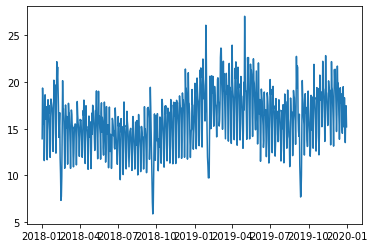

In [ ]:
plt.plot(df_result.groupby(['date'])['qty'].mean())

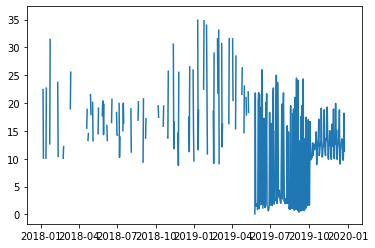

In [ ]:
plt.plot(df_result.groupby(['date'])['pred'].mean())

In [ ]:
inv_y = df_result[(df_result['date']<='2019-09-30')].groupby('date')['qty'].mean()
true_y = df_result[(df_result['date']>'2019-09-30')].groupby('date')['qty'].mean()
pred_y = df_result[(df_result['date']>'2019-09-30')].groupby('date')['pred'].mean()

In [ ]:
date_train = df_result[(df_result['date']<='2019-09-30')]['date'].unique()
date_test = df_result[(df_result['date']>'2019-09-30')]['date'].unique()

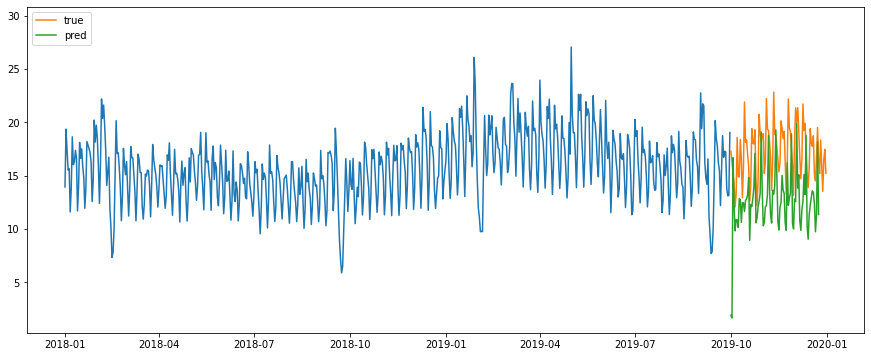

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(date_train, inv_y)
plt.plot(date_test, true_y, label='true')
plt.plot(date_test, pred_y, label='pred')
plt.legend()
plt.show()

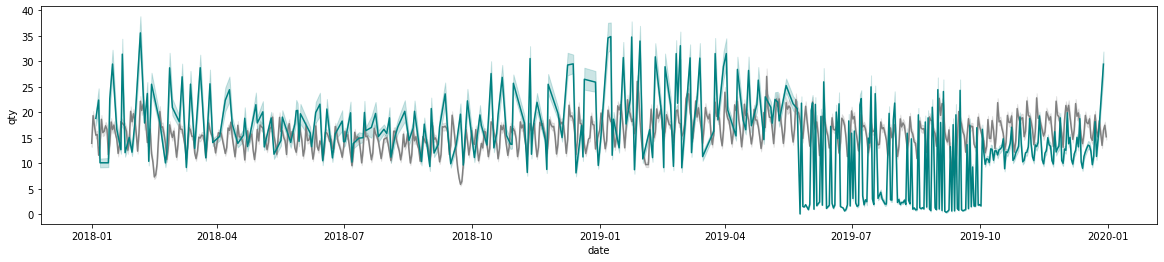

In [ ]:
# visualize 
test1_tmp = df_result[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_result.date, y=df_result.qty, color='gray') # 실제 
sns.lineplot(x=df_result.date, y=df_result.pred, color='teal') # 예측 

plt.show()

In [ ]:
df_plot = df_result[df_result['pred']!=0]

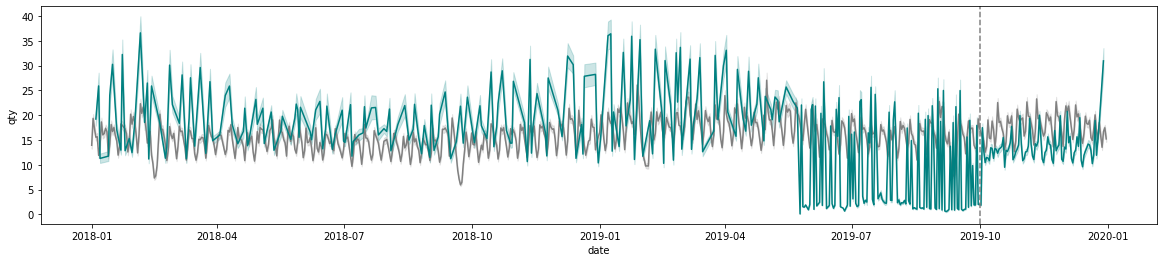

In [ ]:
# visualize 
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_plot.date, y=df_plot.qty, color='gray') # 실제 
sns.lineplot(x=df_plot.date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray')

plt.show()

(array([203454., 122544.,  95805.,  78705.,  64026.,  54684.,  47394.,
         42219.,  36477.,  30150.]),
 array([0.        , 0.99999604, 1.99999208, 2.99998813, 3.99998417,
        4.99998021, 5.99997625, 6.9999723 , 7.99996834, 8.99996438,
        9.99996042]),
 <a list of 10 Patch objects>)

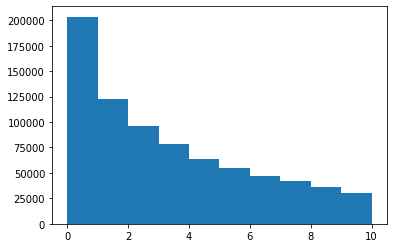

In [ ]:
plt.hist(df_result[df_result['pred']<10]['pred'])

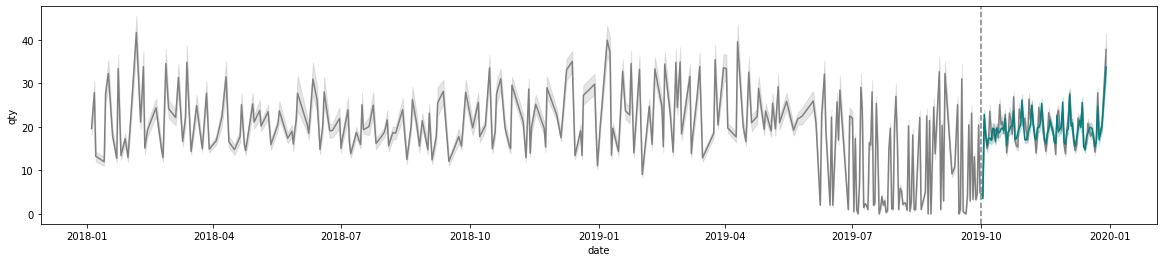

In [ ]:
# visualize 
df_plot = df_result[df_result['pred']>=2].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_plot.date, y=df_result.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-10-01'].date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray')

plt.show()

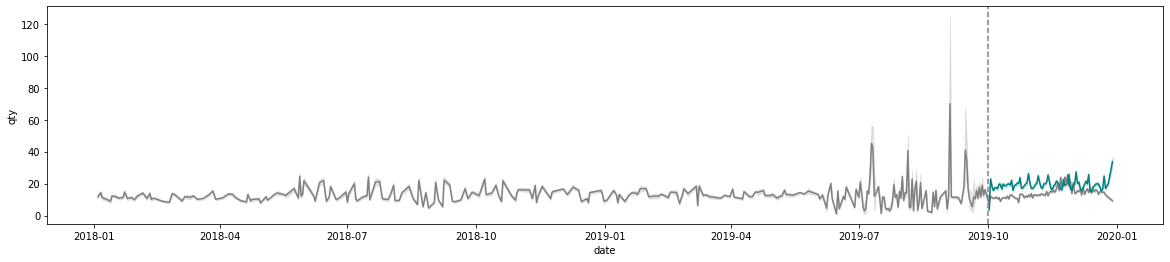

In [ ]:
# visualize 
df_plot = df_result[df_result['pred']>=2].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_plot.date, y=df_result.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-10-01'].date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray')

plt.show()

(array([688617.,  86481.,  30195.,  14013.,   7137.,   4320.,   2565.,
          2016.,   1260.,    882.]),
 array([  0. ,  29.9,  59.8,  89.7, 119.6, 149.5, 179.4, 209.3, 239.2,
        269.1, 299. ]),
 <a list of 10 Patch objects>)

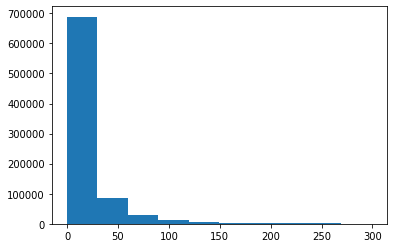

In [ ]:
plt.hist(df_plot[df_plot['qty']<300]['qty'])

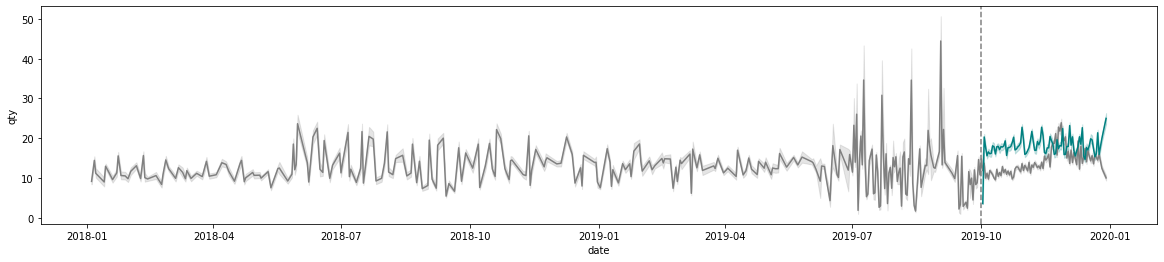

In [ ]:
# visualize 
df_use = df_result[df_result['qty']<300]
df_plot = df_use[df_use['pred']>=2].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_plot.date, y=df_use.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-10-01'].date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray')

plt.show()

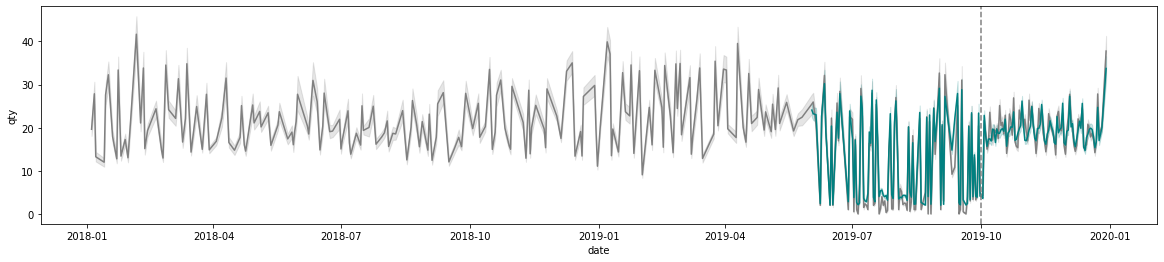

In [ ]:
# visualize 
df_plot = df_result[df_result['pred']>=2].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_plot.date, y=df_plot.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-06-01'].date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 6, 1), linestyle = "dashed", color='gray')

plt.show()

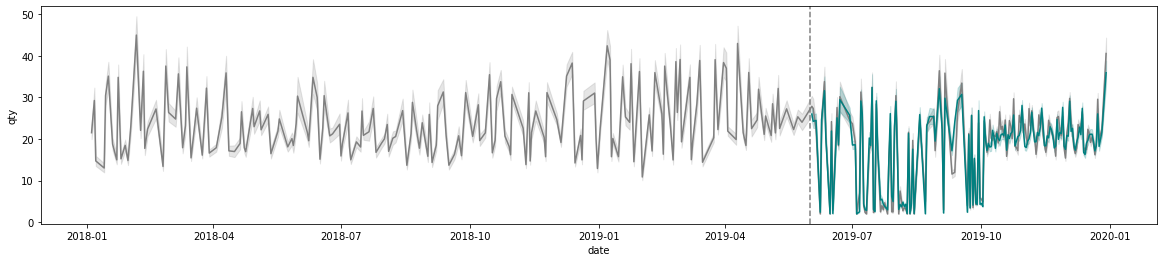

In [ ]:
# visualize 
df_plot = df_result[(df_result['pred']>=2)&(df_result['qty']>=2)].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(20,4))
sns.lineplot(x=df_plot.date, y=df_plot.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-06-01'].date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 6, 1), linestyle = "dashed", color='gray')

plt.show()

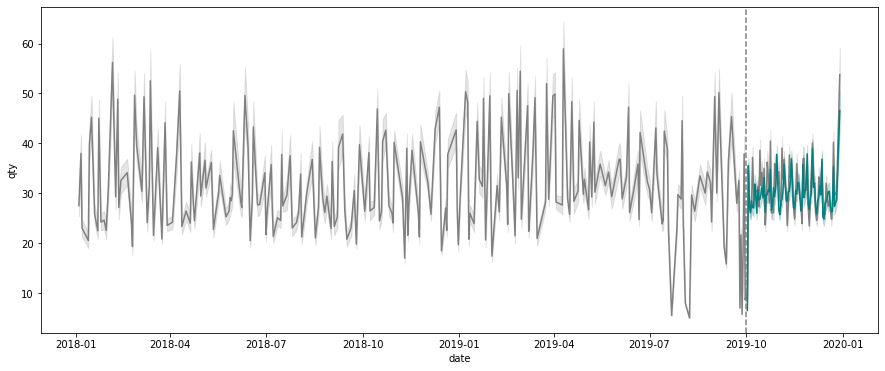

In [ ]:
# visualize 
df_plot = df_result[(df_result['pred']>=5)&(df_result['qty']>=5)].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(15,6))
sns.lineplot(x=df_plot.date, y=df_plot.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-10-01'].date, y=df_plot.pred, color='teal') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray')

plt.show()

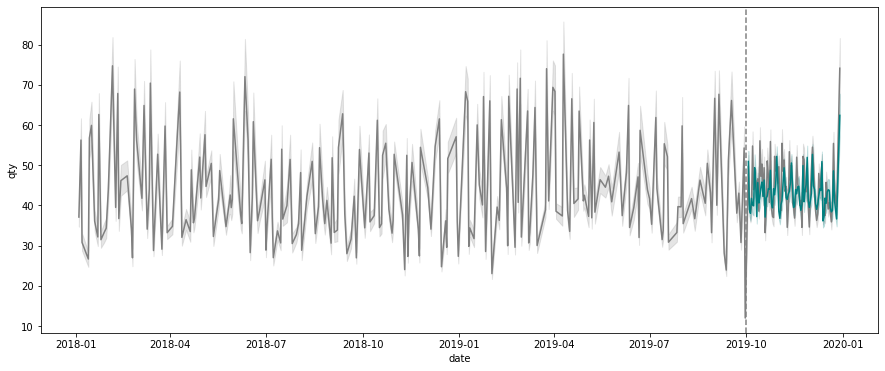

In [ ]:
# visualize 
df_plot = df_result[(df_result['pred']>=10)&(df_result['qty']>=10)].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(15,6))
sns.lineplot(x=df_plot.date, y=df_plot.qty, color='gray') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-10-01'].date, y=df_plot.pred, color='teal', label='pred') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray', label='true')
plt.legend()

plt.show()

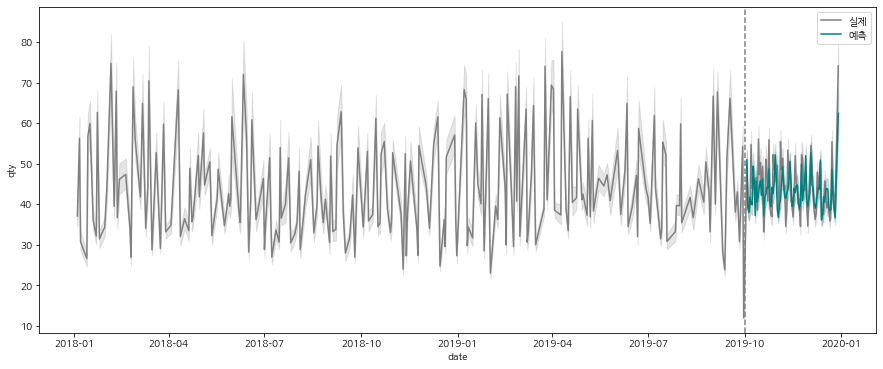

In [ ]:
# visualize 
df_plot = df_result[(df_result['pred']>=10)&(df_result['qty']>=10)].reset_index(drop=True)
test1_tmp = df_plot[['date', 'qty', 'pred']]

plt.figure(figsize=(15,6))
sns.lineplot(x=df_plot.date, y=df_plot.qty, color='gray', label='실제') # 실제 
sns.lineplot(x=df_plot[df_plot['date']>'2019-10-01'].date, y=df_plot.pred, color='teal', label='예측') # 예측 
plt.axvline(datetime.date(2019, 10, 1), linestyle = "dashed", color='gray') # 예측시작선
plt.legend()

plt.show()

In [6]:
df_pred = pd.concat([df_pred1, df_pred2, df_pred3], axis=0)
df_metric = pd.concat([df_metric1, df_metric2, df_metric3], axis=0)

In [ ]:
df_pred.head(2)

,date,sex,age,sm_cat,pred
0,2019-10-03,남성,20대,샤워코롱,0.089238
1,2019-10-04,남성,20대,샤워코롱,0.093895


In [ ]:
df_pred.shape

(68912, 5)

In [ ]:
df_metric.head(2)

,age,sex,sm_cat,mse,rmse,mape
0,20대,남성,샤워코롱,0.497436,0.705292,inf
1,30대,남성,샤워코롱,0.788259,0.887840,inf


In [ ]:
df_metric.shape

(890, 6)

In [7]:
pd.merge(df_pred, df_metric, how='left', on=['sex', 'age', 'sm_cat']).to_csv('LSTM_result.csv', encoding='CP949', index=False)